# Exploratory Data Analysis (EDA) based on session data 

This notebook contains code that is used to analyze session data from academic year 2017-18

## Analysis of a particular database 

The following code created a csv file that would be reimported for further analysis. 
The created sample file is in the folder "sample_outcome". It is called "domain_acad_prog_prog_yr. Below is a sample outcome, which aggregate the user data by domain, faculty, academic program, and the program year


In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from pylab import *
%matplotlib inline
plt.style.use("fivethirtyeight")


In [22]:
df=pd.read_csv("data/session1718.csv")
#df.head(2)
#df.info()

C:\Users\jochoi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
#plt.style.available
df.drop(['Unnamed: 0','Usr_id'],axis=1,inplace=True)

#df['acad_prog']=df['acad_prog'].fillna("staff")
#df['FT/PT']=df['FT/PT'].fillna("Not Applicable")
#df['Undergrad']=df['Undergrad'].fillna("Not Applicable")
df['user_id']=df['user_id'].astype(str)
df['Faculty'] = df['Faculty'].astype("category")
df['access_date']=df['access_date'].astype('datetime64[ns]')
df['on_or_off'] = df['on_or_off'].astype("category")
df['Undergrad'] = df['Undergrad'].astype("category")
df['PROGRAM_YEAR']=df['PROGRAM_YEAR'].astype('category')
df['acad_prog']=df['acad_prog'].astype('category')
df['domain']=df['domain'].astype('category')
df['url']=df['url'].astype('category')
df['FT/PT'] = df['FT/PT'].astype("category")

In [24]:
df.columns=['user_id','url','domain','on_or_off','access_date','total_per_session','prog_yr','FT/PT',"acad_prog","Undergrad",'Faculty']

In [11]:
dfg=df.groupby(["domain","Faculty","acad_prog",'prog_yr'])['prog_yr'].count().fillna(0)
dfg.to_csv("sample_outcome/domain_acad_prog_prog_yr1718.csv")
dfg.head(5)


domain                         Faculty  acad_prog                      prog_yr
18thcjournals.amdigital.co.uk  Arts     Arts and Contemporary Studies  1           1
                                                                       4           1
                                        Bachelor of Arts               1          12
                                                                       2          11
                                                                       3           2
Name: prog_yr, dtype: int64

A separate Excel file is created for two reasons. 
* For endusers: Librarians who feel more comfortable using MS Excel can conduct further analysis with this exported file
* For ourselves: It reduces the process time, as this csv file would be much smaller. The code above only needs to be run once for each year and this could be used for future use.  

The example below showed an example how this could be used for further analysis.
Hypothetically speaking, if we decided to cancel ACS.org, we could want to identify the biggest user groups of this domain. 
The following code would help us do that. 


In [12]:
dap=pd.read_csv("sample_outcome/domain_acad_prog_prog_yr.csv",names=['domain','Faculty','acad_prog',"prog_yr",'total'])
dap=dap.set_index("domain")
dap.head()

dapfilter=dap.filter(like="acs",axis=0)
print("The 10 academic program-program year using ACS the most")
display(dapfilter.sort_values(by='total',ascending=False)[:7])
#display(dap[dap['domain']=="heinonline.com"])


The 10 academic program-program year using ACS the most


,Faculty,acad_prog,prog_yr,total
domain,,,,
acs.org,Science,Bachelor of Science,2,1822
acs.org,Engineering and Architectural Sci,PhD Mech and Industrial Engr,G,1374
acs.org,Science,Bachelor of Science,4,1137
acs.org,Science,Bachelor of Science,3,1094
acs.org,Science,Bachelor of Science,1,921
acs.org,Science,Biomedical Sciences,1,811
acs.org,Engineering and Architectural Sci,Bachelor of Engineering,4,800


## Overall/number of unique users

The following section analyzed the academic programs that have highest usages.


In [92]:
print("Biggest 15 user group (Number of potential users)")

dfs=pd.read_excel("/data/acad_prog.xlsx")
dfs.head()
dfstd=pd.read_csv('data/student1718.csv')
#print(dfs.sort_values(ascending=False)[:15])
dfstd=dfstd.groupby(['ACAD_PROG_DESCR'])['USERNAME'].count()
dfs.drop(['1','2','3','4','G','Grandtotal','FT/PT'],axis=1,inplace=True)
dfstd=pd.DataFrame(dfstd)
dfstudent=pd.merge(dfs,dfstd,left_on='acad_prog',right_on="ACAD_PROG_DESCR",how='right')
dfs=dfstudent.drop(['acad_prog','Undergrad','Faculty'],axis=1)
dfs=pd.DataFrame(dfs)
dfs.columns=['acad_prog','PotentialUsers']
dfs.head()

Biggest 15 user group (Number of potential users)


,acad_prog,PotentialUsers
0,Business Management,6539
1,Bachelor of Engineering,4811
2,MASC Aerospace Engineering,2
3,Bachelor of Arts,3695
4,Business Technology Mgt.,1744


In [93]:

print("Number of active users of each academic program")

dfu=pd.DataFrame(df.groupby('acad_prog')['user_id'].nunique())
dfu=dfu.reset_index()
dfu.columns=['acad_prog','ActiveUsers']

#TopUnique=dfu.sort_values(by=1,ascending=False)[:5]

dfu.head()
#print(dfu.sort_values(ascending=False,by=1)[:15])



Number of active users of each academic program


,acad_prog,ActiveUsers
0,Accounting and Finance,997
1,Architectural Science,504
2,Arts and Contemporary Studies,403
3,Bachelor of Arts,3616
4,Bachelor of Engineering,3621


In [95]:
#dfs.columns=['acad_prog','PotentialUsers']
dfs=pd.DataFrame(dfs.groupby('acad_prog')['PotentialUsers'].sum())
dfs=dfs.reset_index()
dfs.head()

,acad_prog,PotentialUsers
0,Accounting and Finance,1058
1,Architectural Science,520
2,Arts and Contemporary Studies,492
3,Bachelor of Arts,3695
4,Bachelor of Engineering,4812


As expected, our top active users are likely to come from the othe big potential user group

In [96]:

#dfus=pd.concat([dfs,dfu],axis=1,sort=True)
dfus=pd.merge(dfs,dfu,on="acad_prog",how='left')
dfus["Percent"]=dfus.ActiveUsers/dfus.PotentialUsers
dfus.tail()

,acad_prog,PotentialUsers,ActiveUsers,Percent
129,Ryerson ESL Foundation Program,165,109,0.660606
130,Social Work,933,955,1.023580
131,Social Work Part-time,228,252,1.105263
132,Special Student Status,98,41,0.418367
133,Urban & Regional Planning,466,473,1.015021


In [97]:
dfdpt.head()

,acad_prog,totaluses
0,Accounting and Finance,64405
1,Architectural Science,48069
2,Arts and Contemporary Studies,81399
3,Bachelor of Arts,988294
4,Bachelor of Engineering,309910


In [98]:
print("Number of access aggregated by academic program")

dfdpt=pd.DataFrame(df.groupby("acad_prog")["user_id"].count())
dfdpt=dfdpt.reset_index()
dfdpt.columns=['acad_prog','totaluses']
#dfdpt['Per user usage']=df.groupby("acad_prog")["user_id"].count()/df.groupby('acad_prog')['user_id'].nunique()


#dfus=pd.concat([dfus,dfdpt],axis=1,sort=True)
dfus=pd.merge(dfus,dfdpt,on='acad_prog',how='left')
dfus['Per user usage']=dfus['totaluses']/dfus['ActiveUsers']


Toptotal=dfdpt.sort_values(by=["totaluses"],ascending=False)[:5]

print(dfdpt.sort_values(by=["totaluses"],ascending=False)[:15])

print("*"*40)




Number of access aggregated by academic program
                          acad_prog  totaluses
3                  Bachelor of Arts     988294
8               Business Management     459367
4           Bachelor of Engineering     309910
18    Collaborative Nursing Ryerson     309400
130                     Social Work     238048
25          Early Childhood Studies     210679
14             Child and Youth Care     192589
5               Bachelor of Science     186109
17       Coll. Nursing George Brown     184338
16         Coll. Nursing Centennial     168718
99               Nutrition and Food     163727
122  Postgrad Nursing and Midwifery     141213
97        Nursing Deg Completion PT     139332
21              Creative Industries     137588
98        Nursing Degree Completion     116960
****************************************


In [99]:
dfus.head()

,acad_prog,PotentialUsers,ActiveUsers,Percent,totaluses,Per user usage
0,Accounting and Finance,1058,997,0.942344,64405,64.598796
1,Architectural Science,520,504,0.969231,48069,95.375000
2,Arts and Contemporary Studies,492,403,0.819106,81399,201.982630
3,Bachelor of Arts,3695,3616,0.978620,988294,273.311394
4,Bachelor of Engineering,4812,3621,0.752494,309910,85.586854


In [86]:
print("Academic Program with the most active users")
print(dfus.sort_values(by=["Percent"],ascending=False)[:20])

Academic Program with the most active users
                           acad_prog  PotentialUsers  ActiveUsers   Percent  \
57                     MA Psychology              38           55  1.447368   
91       Master of Science in Mngmnt              40           57  1.425000   
69     MBA Mgmt of Technol and Innov              21           27  1.285714   
122   Postgrad Nursing and Midwifery             174          223  1.281609   
119  Postgrad Biomedical Engineering              25           32  1.280000   
125                   RT Sport Media             212          262  1.235849   
115               PhD Policy Studies              43           51  1.186047   
120    Postgrad Chemical Engineering              18           21  1.166667   
61             MASc Building Science              12           14  1.166667   
50                        MA Fashion              32           37  1.156250   
110            PhD Civil Engineering              36           41  1.138889   
98      

Academic Program with the most active users
                                PotentialUsers  ActiveUsers  \
acad_prog                                                     
MA Psychology                             38.0           38   
Phd Biomedical Physics                    21.0           21   
MPL Urban Development                     67.0           67   
MA Fashion                                32.0           32   
MA Early Childhood Studies                22.0           22   
MA Child and Youth Care                   20.0           20   
MA Literatures of Modernity               22.0           22   
MASc Chemical Engineering                 23.0           23   
MA Public Policy & Admin                  38.0           38   
PhD Psychology                            61.0           61   
Phd Envir.App.Sci and Mgt                 23.0           23   
Postgrad Nursing and Midwifery           174.0          173   
PhD Mech and Industrial Engr              63.0           62   
Collaborati

In [88]:
print("Academic Program with fewer active users")
print(dfus.sort_values(by=["Percent"])[:20])


Academic Program with fewer active users
                         acad_prog  PotentialUsers  ActiveUsers   Percent  \
9                 Business Special              68            9  0.132353   
27             Engineering Special              89           12  0.134831   
40            Image Arts-New Media              30            6  0.200000   
121     Postgrad Computer Networks              81           17  0.209877   
55             MA Media Production              27            8  0.296296   
128    Retail Management Part-time              23            7  0.304348   
23               Digital Media MDM              39           12  0.307692   
81          MPC Prof Communication              26           10  0.384615   
11          Business Tech. Mgt. PT             256          100  0.390625   
132         Special Student Status              98           41  0.418367   
29   Entrprs Info Protection PMDip              11            5  0.454545   
7              Bus. Mgt. Part-Time 

In [89]:
dfus.head()
dfus.to_csv("sample_outcome/Summary of Active Users1718.csv")

In [91]:
print("*"*40)

print("Academic Program with highest usages (per person) in descending order")

Top15=dfus.sort_values(by=["Per user usage"],ascending=False)[:5]
print(dfus.sort_values(by=["Per user usage"],ascending=False)[:15])


****************************************
Academic Program with highest usages (per person) in descending order
                          acad_prog  PotentialUsers  ActiveUsers   Percent  \
57                    MA Psychology              38           55  1.447368   
122  Postgrad Nursing and Midwifery             174          223  1.281609   
30            Envir. App.Sci.& Mgt.              56           62  1.107143   
113    PhD Mech and Industrial Engr              63           65  1.031746   
117          Phd Biomedical Physics              21           23  1.095238   
50                       MA Fashion              32           37  1.156250   
116                  PhD Psychology              61           58  0.950820   
98        Nursing Degree Completion             211          240  1.137441   
80     MHSc Nutrition Communication              39           40  1.025641   
120   Postgrad Chemical Engineering              18           21  1.166667   
112         PhD Elec & Computer

In [27]:
print("*"*40)
print("Undergraduate Program with highest usage (per person in descending order)")
dfunder=df[df["Undergrad"]=="Undergrad"]
dfdpt2=dfunder.groupby("acad_prog")["user_id"].count()/dfunder.groupby('acad_prog')['user_id'].nunique()
UTop15=dfdpt2.sort_values(ascending=False)[:15]
print(UTop15)

****************************************
Undergraduate Program with highest usage (per person in descending order)
acad_prog
Nursing Degree Completion        487.333333
Collaborative Nursing Ryerson    386.267166
Nutrition and Food               324.855159
Midwifery                        320.985714
Nursing Deg Completion PT        309.626667
Child and Youth Care             307.650160
Coll. Nursing Centennial         303.996396
Midwifery Part-time              293.960784
Coll. Nursing George Brown       279.300000
Bachelor of Arts                 273.311394
Social Work                      249.264921
Early Childhood Studies          247.857647
Child and Youth Care PT          223.122302
Early Childhood Studies CTPT     220.785047
Disability Studies Part-time     210.387283
Name: user_id, dtype: float64


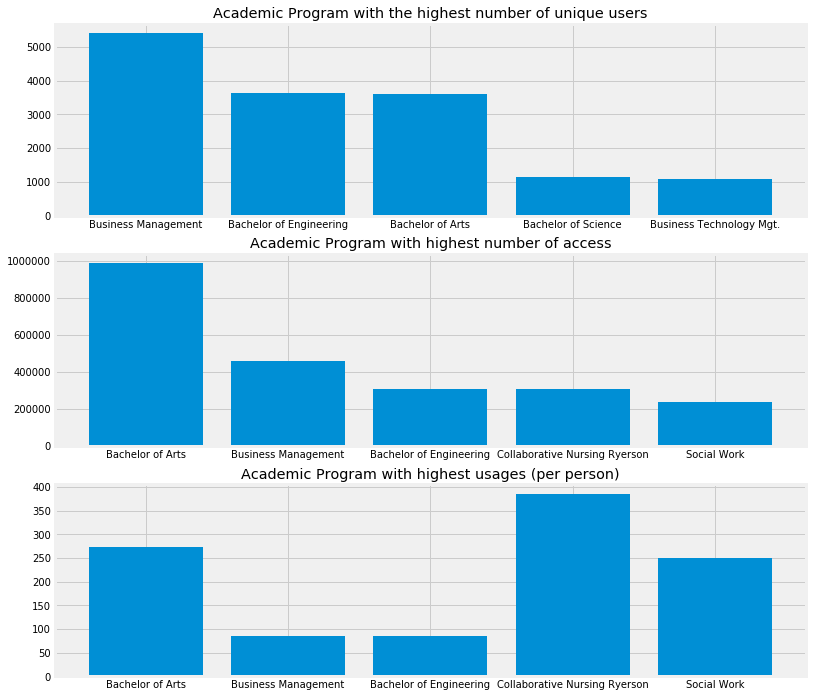

In [28]:
fig = plt.figure(figsize=(12,12)) 

subplot(3,1,1)

plt.bar(TopUnique.index,TopUnique)
plt.title("Academic Program with the highest number of unique users")

subplot(3,1,2)
plt.bar(Toptotal.index,Toptotal['user_id'])
plt.title("Academic Program with highest number of access")
subplot(3,1,3)

plt.bar(Toptotal.index,Toptotal["Per user usage"])
plt.title("Academic Program with highest usages (per person)")
plt.show()



The tables above have been aggregated and can be export for further analysis. 

Here is a sample outcome for explorating the relationship between the number of unique users, number of total access, and average organized academic program

The correlation showed that average does not correlate with total access.  

In [ ]:

#dfa=pd.merge(pd.DataFrame(dfdpt),pd.DataFrame(dfu),left_index=True,right_index=True)

#dfa=pd.merge(dfa,pd.DataFrame(dfdpt1),left_index=True,right_index=True)
#dfa.columns=['total','unique','average']
#dfa.head()

#dfa.to_csv("sample_outcome/acad_prog_total_unique_average.csv")


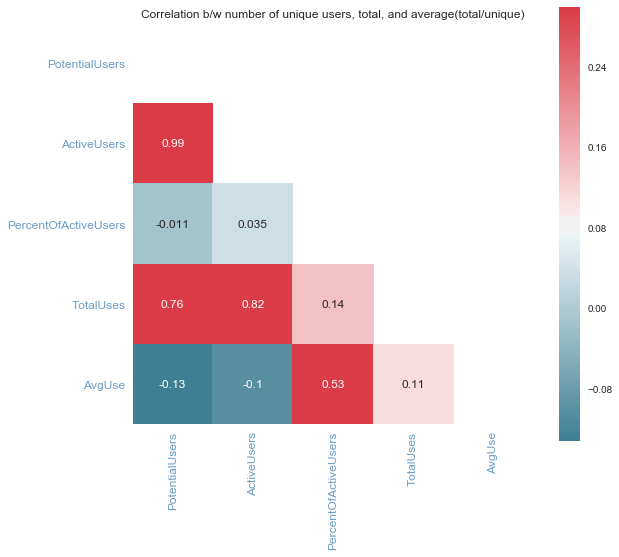

In [29]:
#calculation of correlation 



def display_corr(values, size):
    sns.set(style="white")

    #the correlation matrix
    corr = values.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True,cmap=cmap, vmax=.3,
            square=True,  ax=ax)
    ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8, rotation=90)
    ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
    
    
display_corr(dfus, 8)


plt.title("Correlation b/w number of unique users, total, and average(total/unique)")
plt.show()



## Analysis of use by full-time students and part-time students

The following graph plots the trend of full-time and part-time student over the period of 12 months. 

It also showed a surge of use in fall semester for the user group "Not Applicable", which is for faculty, staff, and other users that were not identified as students. 

<Figure size 576x864 with 0 Axes>

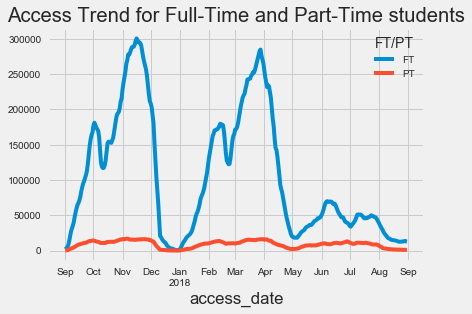

In [30]:
g1=df.groupby([pd.Grouper(key='access_date', freq='D'),'FT/PT'])['FT/PT'].count().unstack().fillna(0)
g1.sample()
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(8,12)) 
g1.rolling('7D').sum().plot()

plt.title("Access Trend for Full-Time and Part-Time students")
plt.show();

## Analysis of Graduate and Undergraduate students

The following graph shows trend of graduate student, undergraduate student in 12 month period 


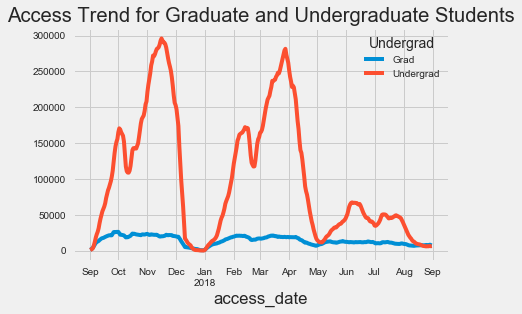

In [31]:
g1=df.groupby([pd.Grouper(key='access_date', freq='D'),'Undergrad'])['Undergrad'].count().unstack().fillna(0)
g1.sample()
g1.rolling('7D').sum().plot()
plt.title("Access Trend for Graduate and Undergraduate Students")
plt.show()